<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Monte_Carlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monte Carlo Simulation
Problem Statement
Imagine you are the marketing manager for a firm that is planning to introduce a new product. You need to estimate the first year net profit for this product, which will depend on:

Sales volume in units
Price per unit
Unit cost
Fixed costs
Net profit will be calculated as: Net Profit = Sales Volume* (Selling Price - Unit cost) - Fixed costs

Fixed costs (for overhead, advertising, etc.) are known to be $120,000. But the other factors all involve some uncertainty. Sales volume (in units) can cover quite a range, and the selling price per unit will depend on competitor actions. Unit costs will also vary depending on vendor prices and production experience.

So, here we have 3 unknown variables in the equation, which can take any possible values.

1. Sales and Price:

Based on your market research, you believe that there are equal chances that the market will be Slow, OK, or Hot.

In the "Slow market" scenario, you expect to sell 50,000 units at an average selling price of $11.00 per unit.
In the "OK market" scenario, you expect to sell 75,000 units, but you'll likely realize a lower average selling price of $10.00 per unit.
In the "Hot market" scenario, you expect to sell 100,000 units, but this will bring in competitors who will drive down the average selling price to $8.00 per unit.
As a result, you expect to sell 75,000 units (i.e.,(50,000+75,000+100,000)/3 = 75,000) at an average selling price of $9.67 per unit (i.e.,(11+10+8)/3 = 9.67).

2. Unit Cost:

Another uncertain variable is Unit Cost. Your firm’s production manager advises you that unit costs may be anywhere from 5.50 to 7.50, with a most likely cost of $6.50. In this case, the most likely cost is also the average cost.

The Average Model
With the above information at hand, one might think it will be a good idea to use the average values for each of the variables and estimate the net profit.

So, let's go ahead and try that to see how it works.



https://github.com/hariharan2305/DailyKnowledge/blob/master/Monte%20Carlo%20Simulation/Monte%20Carlo%20Simulation.ipynb

In [1]:
# Function to calculate the Net Profit
def Profit(Sales, Price, Cost, Fixed_Cost):
    profit = (Price - Cost) * Sales - Fixed_Cost
    
    return profit


In [2]:
# Average Model
fixed_cost = 120000 #given in the problem statement
sales_v_avg = 75000
price_avg = 9.67
unit_cost = 6.50

# Net Profit
Net_Profit_Avg = Profit(sales_v_avg, price_avg, unit_cost,fixed_cost)
print(f"The Net Profit for an Average model: {Net_Profit_Avg}")


The Net Profit for an Average model: 117750.0


The Net Profit for an Average model: 117750.0
But can you be sure that your estimate for the net profit is 117K? Does this number makes sense? Will you be able to present this finding to your manager in the next meeting that the net profit for the yet-to-be-launched product would be 117K? - Well, most of you might say NO!

And you are right. It's always better to report the range of values the net profit could take in different scenarios rather than a single point estimate of the average value. But we how to do that?

That's where Monte Carlo Simulation comes in.

The idea of Monte Carlo Simulation is to test various outcome possibilities. In reality, only one of the outcome possibilities will play out, but in terms of risk assessment, any of the possibilities could have occurred!

Monte Carlo Simulation Model
In our problem, we have 3 unknown variables (Sales, Price, Unit Cost), that are needed to calculate the Net Profit.

What we are going to do is, we will randomly plug in values for these 3 variables and calculate the multiple possible outcomes for the Net Profit. Finally, if you check the distribution of the Net Profit estimates, you can get a sense of how much extreme the values could go, what could be the average value and many useful statistics.

But the important thing to consider here is the distribution of the unknown variables.

Market Scenario: The Sales volume and Price of the product depends upon the Market Scenario. So, here we need to consider how likely it is for each of the different market scenario to happen. Here, there is an equal chance that all the three scenarios could happen. Hence, we can use "Uniform distribution".


In [3]:
# Function to model the market scenario and select sales volume and price per unit
import numpy as np

def Market_Scenario():
    market_condition = np.random.choice([1, 2, 3],size=1)[0]
    
    # Selecting the Sales volume and price per unit based on the market condition
    # Hot Market
    if market_condition == 1:
        sales_v = 100000
        unit_price = 8
    
    # OK Market
    elif market_condition == 2:
        sales_v = 75000
        unit_price = 10
    
    # Slow Market
    else:
        sales_v = 50000
        unit_price = 11
    
    return market_condition, sales_v, unit_price


Unit Cost: It is given in the problem statement that, the unit cost lies between 5.50 and 7.50 with a mean of $6.50. Note that the unit cost could take any values between 5.50 and 7.50, so we can use "Normal distirbution" to sample the values for this variable. For the Normal distirbution: mean = 6.50 and standard_deviation = (upper level - lower level)/3.29. [The value of 3.29 is obtained from the z-table, it is nothing but the z-score for a 95% confidence interval]


In [5]:
# Function to model the Unit cost for making the product
def UnitCost():
    unit_cost = np.random.normal(loc = 6.50, scale = (7.5 - 5.5)/3.29) #For 90% confidence, z-score = 3.29
    return unit_cost


In [6]:
# Simulation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#number of simulations
num_simulations = 10000  

# create an empty list to store the simulation estiamtes
profit_estimates = [] 

for i in range(num_simulations):
    
    # Get the market scenario
    market, sales, price = Market_Scenario()
    
    # Find the unit cost
    cost = UnitCost()
    
    # Calculate the Net Profit
    p = Profit(sales, price, cost, fixed_cost)
    profit_estimates.append(p)


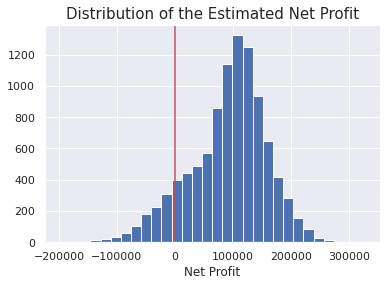

In [7]:
# let's plot the outcome
plt.hist(profit_estimates, bins=30)
plt.axvline(x=0, c='r')
plt.xlabel("Net Profit")
plt.title("Distribution of the Estimated Net Profit", size=15)
plt.show()

In [8]:
# Summary stats of the simulation result
negative_profits = [1 if x < 0 else 0 for x in profit_estimates]

print(f"Minimum Net Profit could be: ${round(min(profit_estimates),3)}")
print(f"Maximum Net Profit could be: ${round(max(profit_estimates),3)}")
print(f"Average Net Profit could be: ${round(np.mean(profit_estimates),3)}")
print(f"Probability of Loss: {round(np.mean(negative_profits)*100,3)}%")

Minimum Net Profit could be: $-198469.621
Maximum Net Profit could be: $326633.664
Average Net Profit could be: $91707.12
Probability of Loss: 10.89%
